In [21]:
#Q!)
# Multiplications required  = n x m x k
# Additions required  = n x m x (k-1)
# To find each element of the new matrix , we multiply each element in a row of the first matrix with each element in a column of the second matrix respectively basically m x k operations and then we have to di it for all the rows in the first matrix thus n x m x k.
# For k multiplications you require k - 1 additions and thus n x m x (k-1) additions.

In [ ]:
#Q2)
import numpy as np
import time
m1 = [[1,2,3],[4,5,6]]
m2 = [[7,8,9,1],[2,3,4,5],[6,7,8,9]]

def normal_mul(m1,m2):
    n = len(m1)
    k = len(m1[0])
    m = len(m2[0])
    C = []
    for i in range(n):
        a = []
        for j in range(m):
            a.append(0)
        C.append(a)
    for i in range(n):
        for j in range(m):
            for l in range(k):
                C[i][j] += m1[i][l] * m2[l][j]

    return C
start1 = time.time()
for i in range(10000):
    ans1 = normal_mul(m1,m2)
end1 = time.time()
normal_time = end1 - start1

m1_arr = np.array(m1)
m2_arr = np.array(m2)
start2 = time.time()
for i in range(10000):
    ans2 = np.matmul(m1,m2)
end2 = time.time()
numpy_time = end2 - start2
print(ans1)
print(ans2)
print("Time taken for normal matrix multiplication :",normal_time/10000)
print("Time taken for numpy matrix multiplication :",numpy_time/10000)
print("The time taken in the average of 10000 iterations")

#While the results show that normal multipication is fast but the time complexity for np.matmul() and our function both are O(n*k*m) but actually the numpy multiplication uses certain optmisations thus it is faster for larger inputs.

[[29, 35, 41, 38], [74, 89, 104, 83]]
[[ 29  35  41  38]
 [ 74  89 104  83]]
Time taken for normal matrix multiplication : 1.3944292068481446e-05
Time taken for numpy matrix multiplication : 1.0771965980529785e-05
The time taken in the average of 10000 iterations


In [ ]:
#Q3)
#the time complexity of that method would be O(n^2) since you would have to find max element for around n/2 times. we can optimise it to O(nlogn) by using sorting or O(n) by using quickselect but its worstcase is still O(n^2). Thus sorting and finding median would be better.

import numpy as np
import timeit

def find_median(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    if n % 2 == 1:
        median = sorted_arr[n // 2]
    else:
        mid1 = sorted_arr[n // 2 - 1]
        mid2 = sorted_arr[n // 2]
        median = (mid1 + mid2) / 2
    return median

def find_median2(arr):
    n = len(arr)
    def find_and_remove_max(arr):
        max_index = 0
        for i in range(1, len(arr)):
            if arr[i] > arr[max_index]:
                max_index = i
        return arr.pop(max_index)

    for _ in range(n // 2):
        find_and_remove_max(arr)

    if n % 2 == 0:
        middle1 = find_and_remove_max(arr)
        middle2 = find_and_remove_max(arr)
        median = (middle1 + middle2) / 2
    else:
        median = find_and_remove_max(arr)

    return median

arr = [3, 6, 2, 8, 7, 5, 1, 4]

def time_find_median():
    return find_median(arr.copy())

find_median_time = timeit.timeit(time_find_median, number=1000)
print(f"find_median time for 1000 runs: {find_median_time:.6f} seconds")
median1 = find_median(arr)
print("Median using find_median:", median1)

def time_find_median2():
    return find_median2(arr.copy())

find_median2_time = timeit.timeit(time_find_median2, number=1000)
print(f"find_median2 time for 1000 runs: {find_median2_time:.6f} seconds")
median2 = find_median2(arr)
print("Median using find_median2:", median2)

def time_np_median():
    return np.median(np.array(arr))

np_median_time = timeit.timeit(time_np_median, number=1000)
print(f"NumPy median time for 1000 runs: {np_median_time:.6f} seconds")
median3 = np.median(np.array(arr))
print("Median using NumPy:", median3)








find_median time for 1000 runs: 0.005508 seconds
Median using find_median: 4.5
find_median2 time for 1000 runs: 0.014548 seconds
Median using find_median2: 3.5
NumPy median time for 1000 runs: 0.088269 seconds
Median using NumPy: 1.5


In [ ]:
#Q4)
#The graident of the give =n function would be : (2xy+(y^3)cosx,x^2+3(y^2)sinx)

#Q5)
import jax.numpy as jnp
from jax import grad, jit

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

grad_f_x = grad(f, argnums=0)
grad_f_y = grad(f, argnums=1)

grad_f_x = jit(grad_f_x)
grad_f_y = jit(grad_f_y)

x_val = jnp.array(2.0)
y_val = jnp.array(3.0)

gradient_x = grad_f_x(x_val, y_val)
gradient_y = grad_f_y(x_val, y_val)

print("Partial derivative with respect to x at (x=2.0, y=3.0):", gradient_x)
print("Partial derivative with respect to y at (x=2.0, y=3.0):", gradient_y)
print("Gradient vector at (x=2.0, y=3.0):", (gradient_x, gradient_y))

#Q6)
import sympy as sp

x, y = sp.symbols('x y')
f = x**2 * y + y**3 * sp.sin(x)

df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

x_val = 2.0
y_val = 3.0

gradient_x = df_dx.subs({x: x_val, y: y_val})
gradient_y = df_dy.subs({x: x_val, y: y_val})

print("Partial derivative with respect to x at (x=2.0, y=3.0):", gradient_x)
print("Partial derivative with respect to y at (x=2.0, y=3.0):", gradient_y)
print("Gradient vector at (x=2.0, y=3.0):", (gradient_x, gradient_y))


Partial derivative with respect to x at (x=2.0, y=3.0): 0.7640352
Partial derivative with respect to y at (x=2.0, y=3.0): 28.55103
Gradient vector at (x=2.0, y=3.0): (Array(0.7640352, dtype=float32, weak_type=True), Array(28.55103, dtype=float32, weak_type=True))
Partial derivative with respect to x at (x=2.0, y=3.0): 0.764035413227155
Partial derivative with respect to y at (x=2.0, y=3.0): 28.5510305242934
Gradient vector at (x=2.0, y=3.0): (0.764035413227155, 28.5510305242934)


In [ ]:
#Q7)
students_records = {
    2022: {
        'Branch 1': {
            1: {
                'Name': 'Alice',
                'Marks': {
                    'Maths': 100,
                    'English': 70
                }
            },
            2: {
                'Name': 'Bob',
                'Marks': {
                    'Maths': 85,
                    'English': 90
                }
            }
        },
        'Branch 2': {
            1: {
                'Name': 'Charlie',
                'Marks': {
                    'Maths': 95,
                    'English': 80
                }
            }
        }
    },
    2023: {
        'Branch 1': {
            1: {
                'Name': 'David',
                'Marks': {
                    'Maths': 78,
                    'English': 88
                }
            }
        },
        'Branch 2': {
            1: {
                'Name': 'Eva',
                'Marks': {
                    'Maths': 82,
                    'English': 85
                }
            }
        }
    },
    2024: {
        'Branch 1': {
            1: {
                'Name': 'Frank',
                'Marks': {
                    'Maths': 92,
                    'English': 77
                }
            }
        },
        'Branch 2': {
            1: {
                'Name': 'Grace',
                'Marks': {
                    'Maths': 88,
                    'English': 93
                }
            }
        }
    },
    2025: {
        'Branch 1': {
            1: {
                'Name': 'Hank',
                'Marks': {
                    'Maths': 81,
                    'English': 86
                }
            }
        },
        'Branch 2': {
            1: {
                'Name': 'Ivy',
                'Marks': {
                    'Maths': 89,
                    'English': 90
                }
            }
        }
    }
}

year = 2022
branch = 'Branch 1'
roll_number = 1

student_name = students_records[year][branch][roll_number]['Name']
student_marks = students_records[year][branch][roll_number]['Marks']

print(students_records)


{2022: {'Branch 1': {1: {'Name': 'Alice', 'Marks': {'Maths': 100, 'English': 70}}, 2: {'Name': 'Bob', 'Marks': {'Maths': 85, 'English': 90}}}, 'Branch 2': {1: {'Name': 'Charlie', 'Marks': {'Maths': 95, 'English': 80}}}}, 2023: {'Branch 1': {1: {'Name': 'David', 'Marks': {'Maths': 78, 'English': 88}}}, 'Branch 2': {1: {'Name': 'Eva', 'Marks': {'Maths': 82, 'English': 85}}}}, 2024: {'Branch 1': {1: {'Name': 'Frank', 'Marks': {'Maths': 92, 'English': 77}}}, 'Branch 2': {1: {'Name': 'Grace', 'Marks': {'Maths': 88, 'English': 93}}}}, 2025: {'Branch 1': {1: {'Name': 'Hank', 'Marks': {'Maths': 81, 'English': 86}}}, 'Branch 2': {1: {'Name': 'Ivy', 'Marks': {'Maths': 89, 'English': 90}}}}}


In [ ]:
#Q8)
class Student:
    def __init__(self, name, roll_number, marks):
        self.name = name
        self.roll_number = roll_number
        self.marks = marks

class Branch:
    def __init__(self):
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self):
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

class Database:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)

database = Database()

year_2022 = Year()
branch_1_2022 = Branch()
branch_1_2022.add_student(Student('Alice', 1, {'Maths': 100, 'English': 70}))
branch_1_2022.add_student(Student('Bob', 2, {'Maths': 85, 'English': 90}))
year_2022.add_branch(branch_1_2022)
branch_2_2022 = Branch()
branch_2_2022.add_student(Student('Charlie', 1, {'Maths': 95, 'English': 80}))
year_2022.add_branch(branch_2_2022)
database.add_year(year_2022)

year_2023 = Year()
branch_1_2023 = Branch()
branch_1_2023.add_student(Student('David', 1, {'Maths': 78, 'English': 88}))
year_2023.add_branch(branch_1_2023)
branch_2_2023 = Branch()
branch_2_2023.add_student(Student('Eva', 1, {'Maths': 82, 'English': 85}))
year_2023.add_branch(branch_2_2023)
database.add_year(year_2023)

year_2024 = Year()
branch_1_2024 = Branch()
branch_1_2024.add_student(Student('Frank', 1, {'Maths': 92, 'English': 77}))
year_2024.add_branch(branch_1_2024)
branch_2_2024 = Branch()
branch_2_2024.add_student(Student('Grace', 1, {'Maths': 88, 'English': 93}))
year_2024.add_branch(branch_2_2024)
database.add_year(year_2024)

year_2025 = Year()
branch_1_2025 = Branch()
branch_1_2025.add_student(Student('Hank', 1, {'Maths': 81, 'English': 86}))
year_2025.add_branch(branch_1_2025)
branch_2_2025 = Branch()
branch_2_2025.add_student(Student('Ivy', 1, {'Maths': 89, 'English': 90}))
year_2025.add_branch(branch_2_2025)
database.add_year(year_2025)

year = 2022
branch_index = 0
roll_number = 1

student = database.years[year - 2022].branches[branch_index].students[roll_number - 1]
print(f"Student Name: {student.name}")
print(f"Roll Number: {student.roll_number}")
print(f"Marks: {student.marks}")


Student Name: Alice
Roll Number: 1
Marks: {'Maths': 100, 'English': 70}


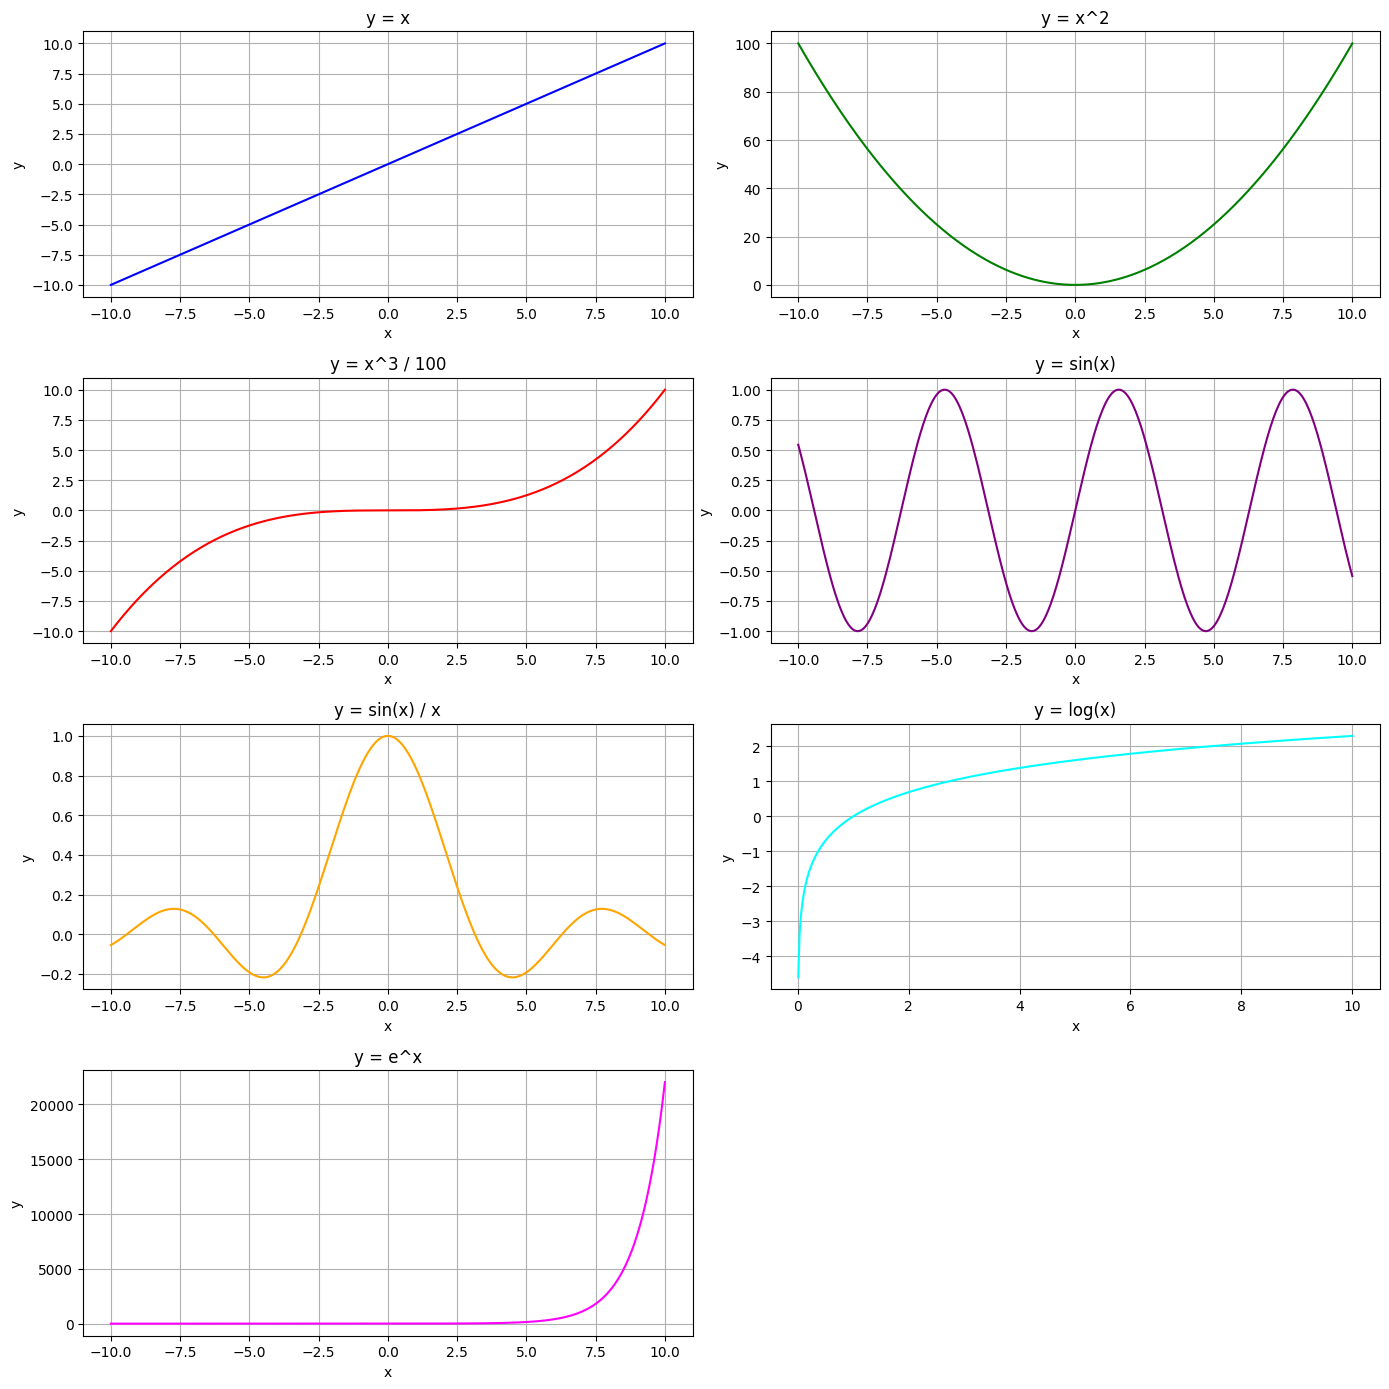

In [12]:
#Q9)
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 400)
x_pos = np.linspace(0.01, 10, 400)

y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / np.where(x == 0, np.nan, x)
y6 = np.log(x_pos)
y7 = np.exp(x)

fig, axs = plt.subplots(4, 2, figsize=(14, 14))

axs[0, 0].plot(x, y1, color='blue')
axs[0, 0].set_title('y = x')
axs[0, 0].grid(True)

axs[0, 1].plot(x, y2, color='green')
axs[0, 1].set_title('y = x^2')
axs[0, 1].grid(True)

axs[1, 0].plot(x, y3, color='red')
axs[1, 0].set_title('y = x^3 / 100')
axs[1, 0].grid(True)

axs[1, 1].plot(x, y4, color='purple')
axs[1, 1].set_title('y = sin(x)')
axs[1, 1].grid(True)

axs[2, 0].plot(x, y5, color='orange')
axs[2, 0].set_title('y = sin(x) / x')
axs[2, 0].grid(True)

axs[2, 1].plot(x_pos, y6, color='cyan')
axs[2, 1].set_title('y = log(x)')
axs[2, 1].grid(True)

axs[3, 0].plot(x, y7, color='magenta')
axs[3, 0].set_title('y = e^x')
axs[3, 0].grid(True)

axs[3, 1].axis('off')

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')

plt.tight_layout()
plt.show()


In [15]:
#Q10)
import numpy as np
import pandas as pd

matrix = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])
std_devs = df.std()
column_with_highest_std = std_devs.idxmax()
means = df.mean(axis=1)
row_with_lowest_mean = means.idxmin()
print(df)
print(f"Column with the highest standard deviation: {column_with_highest_std}")
print(f"Row with the lowest mean: {row_with_lowest_mean}")

#Q11)
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')
count_LT8 = (df['g'] == 'LT8').sum()
std_LT8 = df[df['g'] == 'LT8']['f'].std()
std_GT8 = df[df['g'] == 'GT8']['f'].std()
print(df)
print(f"Number of rows where 'g' is 'LT8': {count_LT8}")
print(f"Standard deviation of 'f' for 'LT8': {std_LT8}")
print(f"Standard deviation of 'f' for 'GT8': {std_GT8}")

           a         b         c         d         e
0   1.833575  1.762824  1.284840  1.346663  1.208522
1   1.787354  1.821245  1.091090  1.406159  1.818226
2   1.927158  1.916356  1.121203  1.356375  1.471707
3   1.530510  1.245533  1.043749  1.527280  1.466223
4   1.536489  1.959524  1.704212  1.714624  1.856333
5   1.102299  1.795816  1.652491  1.577514  1.882479
6   1.771893  1.209004  1.944766  1.783671  1.375547
7   1.334047  1.292114  1.953900  1.174257  1.319850
8   1.028788  1.044638  1.925341  1.471931  1.686592
9   1.015530  1.189414  1.524031  1.468781  1.418960
10  1.805860  1.243275  1.488275  1.122090  1.159662
11  1.352428  1.055668  1.955794  1.234781  1.165286
12  1.390519  1.617927  1.809783  1.035690  1.162893
13  1.914124  1.917276  1.718956  1.735808  1.567530
14  1.561144  1.618891  1.432419  1.086438  1.288597
15  1.603294  1.714101  1.429651  1.694819  1.955471
16  1.118262  1.344381  1.069785  1.923381  1.305836
17  1.161088  1.953847  1.113886  1.431483  1.

In [18]:
#Q12)
import numpy as np

matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

vector = np.array([10, 20, 30])
result = matrix + vector
print("Matrix:")
print(matrix)
print("\nVector:")
print(vector)
print("\nResult of broadcasting:")
print(result)

#We can see that the sizes of the matrix and the vector are not comaptible but numpy expands the vector by copying it to match the matrix

Matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Vector:
[10 20 30]

Result of broadcasting:
[[11 22 33]
 [14 25 36]
 [17 28 39]]


In [17]:
#Q13)
import numpy as np

def compute_argmin(arr):
    min_index = None
    min_value = float('inf')
    for index, value in enumerate(arr):
        if value < min_value:
            min_value = value
            min_index = index
    return min_index

arr = np.array([10, 20, 5, 30, 15])
print("Index of the minimum element:", compute_argmin(arr))
print("Index of the minimum element using np.argmin:", np.argmin(arr))


Index of the minimum element: 2
Index of the minimum element using np.argmin: 2
